In [ ]:
!unzip Z.zip -d 'Set A'
!unzip O.zip -d 'Set B'
!unzip N.zip -d 'Set C'
!unzip F.zip -d 'Set D'
!unzip S.zip -d 'Set E'

Archive:  Z.zip
  inflating: Set A/Z092.txt          
  inflating: Set A/Z002.txt          
  inflating: Set A/Z003.txt          
  inflating: Set A/Z004.txt          
  inflating: Set A/Z005.txt          
  inflating: Set A/Z006.txt          
  inflating: Set A/Z007.txt          
  inflating: Set A/Z008.txt          
  inflating: Set A/Z009.txt          
  inflating: Set A/Z010.txt          
  inflating: Set A/Z011.txt          
  inflating: Set A/Z012.txt          
  inflating: Set A/Z013.txt          
  inflating: Set A/Z014.txt          
  inflating: Set A/Z015.txt          
  inflating: Set A/Z016.txt          
  inflating: Set A/Z017.txt          
  inflating: Set A/Z018.txt          
  inflating: Set A/Z019.txt          
  inflating: Set A/Z020.txt          
  inflating: Set A/Z021.txt          
  inflating: Set A/Z022.txt          
  inflating: Set A/Z023.txt          
  inflating: Set A/Z024.txt          
  inflating: Set A/Z025.txt          
  inflating: Set A/Z026.txt       

# Import Libraries

In [ ]:
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
GColab = False

if GColab:
  !pip install tqdm
  
import os
from tqdm import tqdm

DATA_DIR_A = '/content/Set A/'
DATA_DIR_B = '/content/Set B/'
DATA_DIR_C = '/content/Set C/'
DATA_DIR_D = '/content/Set D/'
DATA_DIR_E = '/content/Set E/'

  
LABEL_C1 = 0
LABEL_C2 = 1
LABEL_C3 = 2

def load_data():
    data = []
    nbFiles = 0
    for fname in tqdm(os.listdir(DATA_DIR_A)):
        img = np.loadtxt(DATA_DIR_A + fname)
        data.append([img, np.array(LABEL_C1)])
        nbFiles+=1

    #for fname in tqdm(os.listdir(DATA_DIR_B)):
     #   img = np.loadtxt(DATA_DIR_B + fname)
     #   data.append([img, np.array(LABEL_C1)])
     #   nbFiles+=1    
    
    for fname in tqdm(os.listdir(DATA_DIR_C)):
        img = np.loadtxt(DATA_DIR_C + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1

    #for fname in tqdm(os.listdir(DATA_DIR_D)):
        #img = np.loadtxt(DATA_DIR_D + fname)
        #data.append([np.array(img), np.array(LABEL_C2)])
        #nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_E)):
        img = np.loadtxt(DATA_DIR_E + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1
        
    return data


data = load_data()
print(len(data), "Files")

100%|██████████| 100/100 [00:01<00:00, 67.88it/s]

300 Files


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)

nb_train = round(len(data) * 0.8)
data_train = data[0:nb_train]
data_test = data[nb_train:]

X_train = np.array([d[0] for d in data_train])
Y_train = np.array([d[1] for d in data_train])

X_test = np.array([d[0] for d in data_test])
Y_test = np.array([d[1] for d in data_test])

X_train.shape
    
X_train = X_train.reshape(X_train.shape[0], 4097, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

X_test = X_test.reshape(X_test.shape[0], 4097, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

#num_steps = 30
batch_size = 4
nb_epoch = 20
hidden_size = 64
use_dropout=True

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(4097,1)))
#model.add(LSTM(64, return_sequences=False))

if use_dropout:
  model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(model.summary())

history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, epochs=nb_epoch)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
48/48 [==============================] - 61s 871ms/step - loss: 0.7356 - mae: 0.4805 - acc: 0.5563 - val_loss: 0.6532 - val_mae: 0.4557 - val_acc: 0.5625
Epoch 2/20
48/48 [==============================] - 41s 851ms/step - loss: 0.575

dict_keys(['loss', 'mae', 'acc', 'val_loss', 'val_mae', 'val_acc'])


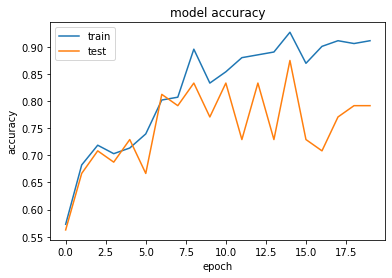

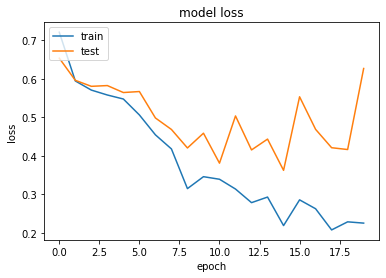

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

15/15 [==============================] - 3s 219ms/step - loss: 0.3290 - mae: 0.1907 - acc: 0.8333


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
import numpy as np
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (240, 4097, 1)
Test shape:  (60, 4097, 1)


In [ ]:
import tensorflow as tf
clf = tf.keras.models.Sequential()

# CNN

In [ ]:
#First CNN layer  with 32 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 13 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=13, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
clf.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
clf.add(Dropout(0.5))
#Flatten the output
clf.add(Flatten())
#Add a dense layer with 512 neurons
clf.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 1024 neurons
clf.add(Dense(units = 1024, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with two outputs
clf.add(Dense(units = 2, activation='softmax'))

In [ ]:
clf.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = clf.fit(X_train, Y_train, epochs = 20)

Epoch 1/20
8/8 [==============================] - 19s 2s/step - loss: 378.7164 - accuracy: 0.5750
Epoch 2/20
8/8 [==============================] - 14s 2s/step - loss: 78.9943 - accuracy: 0.6750
Epoch 3/20
8/8 [==============================] - 14s 2s/step - loss: 41.4340 - accuracy: 0.6500
Epoch 4/20
8/8 [==============================] - 15s 2s/step - loss: 29.4388 - accuracy: 0.6667
Epoch 5/20
8/8 [==============================] - 14s 2s/step - loss: 7.7850 - accuracy: 0.6625
Epoch 6/20
8/8 [==============================] - 15s 2s/step - loss: 1.1913 - accuracy: 0.6250
Epoch 7/20
8/8 [==============================] - 14s 2s/step - loss: 0.5267 - accuracy: 0.7333
Epoch 8/20
8/8 [==============================] - 14s 2s/step - loss: 0.3851 - accuracy: 0.8042
Epoch 9/20
8/8 [==============================] - 14s 2s/step - loss: 0.3343 - accuracy: 0.8625
Epoch 10/20
8/8 [==============================] - 14s 2s/step - loss: 0.2615 - accuracy: 0.8958
Epoch 11/20
8/8 [=================

In [ ]:
score = clf.evaluate(X_test, Y_test)

2/2 [==============================] - 1s 313ms/step - loss: 0.1497 - accuracy: 0.9333


In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 13 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=13, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
model.add(Dropout(0.5))
#Flatten the output
model.add(Flatten())
#Add a dense layer with 512 neurons
model.add(Dense(units = 16, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 1024 neurons
model.add(Dense(units = 32, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with two outputs
model.add(Dense(units = 2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(X_train, Y_train, epochs = 20)

Epoch 1/20
8/8 [==============================] - 7s 755ms/step - loss: 39.0325 - accuracy: 0.6042
Epoch 2/20
8/8 [==============================] - 6s 745ms/step - loss: 13.6734 - accuracy: 0.6292
Epoch 3/20
8/8 [==============================] - 6s 749ms/step - loss: 1.0012 - accuracy: 0.5250
Epoch 4/20
8/8 [==============================] - 6s 740ms/step - loss: 0.6920 - accuracy: 0.6250
Epoch 5/20
8/8 [==============================] - 6s 747ms/step - loss: 0.6554 - accuracy: 0.6875
Epoch 6/20
8/8 [==============================] - 6s 750ms/step - loss: 1.1705 - accuracy: 0.6125
Epoch 7/20
8/8 [==============================] - 6s 741ms/step - loss: 0.8851 - accuracy: 0.6667
Epoch 8/20
8/8 [==============================] - 6s 744ms/step - loss: 0.5421 - accuracy: 0.6583
Epoch 9/20
8/8 [==============================] - 6s 736ms/step - loss: 0.4950 - accuracy: 0.7042
Epoch 10/20
8/8 [==============================] - 6s 743ms/step - loss: 0.4676 - accuracy: 0.7167
Epoch 11/20
8/8 [

In [ ]:
score = model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 130ms/step - loss: 0.3077 - accuracy: 0.9000


In [ ]:
cnn = tf.keras.models.Sequential()

# Proposed Model

In [ ]:
#First CNN layer  with 32 filters, conv window 5, relu activation and same padding
cnn.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
cnn.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
cnn.add(Dropout(0.5))
#Second CNN layer  with 13 filters, conv window 5, relu activation and same padding
cnn.add(Conv1D(filters=13, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
cnn.add(Dropout(0.5))
#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
cnn.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
cnn.add(Dropout(0.5))
#Flatten the output
cnn.add(Flatten())
#Add a dense layer with 512 neurons
cnn.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn.add(Dropout(0.5))
#Add a dense layer with 1024 neurons
cnn.add(Dense(units = 1024, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn.add(Dropout(0.5))
#Softmax as last layer with two outputs
cnn.add(Dense(units = 2, activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = cnn.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
8/8 [==============================] - 6s 636ms/step - loss: 822.2147 - accuracy: 0.5667
Epoch 2/50
8/8 [==============================] - 5s 626ms/step - loss: 236.0581 - accuracy: 0.6292
Epoch 3/50
8/8 [==============================] - 5s 622ms/step - loss: 155.0648 - accuracy: 0.6417
Epoch 4/50
8/8 [==============================] - 5s 614ms/step - loss: 104.4076 - accuracy: 0.5875
Epoch 5/50
8/8 [==============================] - 5s 615ms/step - loss: 62.7823 - accuracy: 0.6625
Epoch 6/50
8/8 [==============================] - 5s 623ms/step - loss: 31.2869 - accuracy: 0.5750
Epoch 7/50
8/8 [==============================] - 5s 628ms/step - loss: 15.2068 - accuracy: 0.6542
Epoch 8/50
8/8 [==============================] - 5s 619ms/step - loss: 12.8820 - accuracy: 0.6125
Epoch 9/50
8/8 [==============================] - 5s 626ms/step - loss: 7.4888 - accuracy: 0.6042
Epoch 10/50
8/8 [==============================] - 5s 628ms/step - loss: 5.8654 - accuracy: 0.6708
Epoch 1

In [ ]:
score = cnn.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 117ms/step - loss: 11.1058 - accuracy: 0.5667


# ANN Model

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1))

In [ ]:
ann.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = ann.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
8/8 [==============================] - 1s 26ms/step - loss: 8.3180 - accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 0s 28ms/step - loss: 8.3180 - accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 0s 25ms/step - loss: 8.3180 - accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 0s 26ms/step - loss: 8.3180 - accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 0s 27ms/step - loss: 8.3180 - accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 0s 25ms/step - loss: 8.3180 - accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 0s 25ms/step - loss: 8.3180 - accuracy: 0.3333
Epoch 8/50
8/8 [==============================] - 0s 26ms/step - loss: 8.3180 - accuracy: 0.3333
Epoch 9/50
8/8 [==============================] - 0s 26ms/step - loss: 8.3180 - accuracy: 0.3333
Epoch 10/50
8/8 [==============================] - 0s 25ms/step - loss: 8.3180 - accuracy: 0.3333
Epoch 11/50
8/8 [============

In [ ]:
score = ann.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 15ms/step - loss: 8.3180 - accuracy: 0.3333
